# T FEROOXIDANS BIOREACTOR

## 1. No Inhibition

In [45]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameter values
# Trial Data


mumax = 0.082     # 1/hour
Ks = 0.0031       # g/liter
Yxs = 0.5         # g/g
Ypx = 0.3    # g/g
Sf = 12         # g/liter
# source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1828821/#!po=50.0000

# Flowrate

def F(t):
    return 0.05

# Reaction rates

def mu(S):
    return mumax*S/(Ks + S)

def Rg(X,S):
    return mu(S)*X
    
def Rp(X,S):
    return Ypx*Rg(X,S)

# ODE

def xdot(x,t):
    X,P,S,V = x
    dX = -F(t)*X/V + Rg(X,S)
    dP = -F(t)*P/V + Rp(X,S)
    dS = F(t)*(Sf-S)/V - Rg(X,S)/Yxs # Perlu diubah sesuai jurnal
    dV = F(t)
    return [dX,dP,dS,dV]

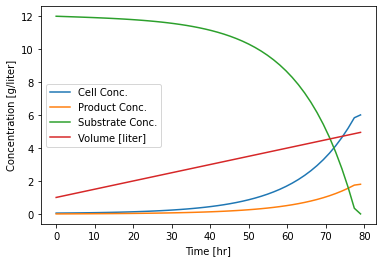

In [46]:
IC = [0.05, 0.0, 12.0, 1.0]

t = np.linspace(0,79)      # Cell concentration max, substrat minimum 79 hours
sol = odeint(xdot,IC,t)
X,P,S,V = sol.transpose()

plt.plot(t,X)
plt.plot(t,P)
plt.plot(t,S)
plt.plot(t,V)

plt.xlabel('Time [hr]')
plt.ylabel('Concentration [g/liter]')
plt.legend(['Cell Conc.',
            'Product Conc.',
            'Substrate Conc.',
            'Volume [liter]'])

## 2. Competitive Inhibition by Fe3+

In [64]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameter values
# Trial Data


mumax = 0.082     # 1/hour
Ks = 0.0031       # g/liter
Kp = 0.0139       # g/liter
Yxs = 0.5         # g/g
Ypx = 0.3    # g/g
Sf = 12         # g/liter
# source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1828821/#!po=50.0000

# Flowrate

def F(t):
    return 0.05

# Reaction rates

def mu(S):
    return mumax*S/(Ks*(1+((Sf-S)/Kp) + S))

def Rg(X,S):
    return mu(S)*X
    
def Rp(X,S):
    return Ypx*Rg(X,S)

# ODE

def xdot(x,t):
    X,P,S,V = x
    dX = -F(t)*X/V + Rg(X,S)
    dP = -F(t)*P/V + Rp(X,S)
    dS = F(t)*(Sf-S)/V - Rg(X,S)/Yxs # Perlu diubah sesuai jurnal
    dV = F(t)
    return [dX,dP,dS,dV]

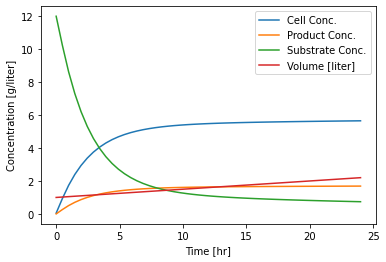

In [65]:
IC = [0.05, 0.0, 12.0, 1.0]

t = np.linspace(0,24)      # Cell concentration max, substrat minimum
sol = odeint(xdot,IC,t)
X,P,S,V = sol.transpose()

plt.plot(t,X)
plt.plot(t,P)
plt.plot(t,S)
plt.plot(t,V)

plt.xlabel('Time [hr]')
plt.ylabel('Concentration [g/liter]')
plt.legend(['Cell Conc.',
            'Product Conc.',
            'Substrate Conc.',
            'Volume [liter]'])
# Product & cell concentration increased slowly at 5+ hours, but volume still increased steadily